# Analyse de base des fichiers éducation nationale. 
Objectif : voir les données, trouvé des pistes pour comprendre l'echec scolaire.

In [55]:
# voir pour vérifier les etabliseement rep et rep +, voir si des établissements serais pas à la fois REP et REP+

In [56]:
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [57]:
# import des données en RAM avec pandas
effectif_prim = pd.read_csv("donnee/fr-en-ecoles-effectifs-nb_classes.csv",sep=";")
effectif_colleges = pd.read_csv("donnee/fr-en-college-effectifs-niveau-sexe-lv.csv",sep=";")
collegue_stat = pd.read_csv("donnee/fr-en-ips-colleges-ap2022.csv",sep=";")
ecole_stat = pd.read_csv("donnee/fr-en-ips-ecoles-ap2022.csv",sep=";")

## Affichage des entêtes des données
Pour les écoles primaires :

In [58]:
effectif_prim.head(1)

,rentree_scolaire,region_academique,academie,departement,commune,numero_ecole,denomination_principale,patronyme,secteur,rep,...,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,tri,code_postal
0,2022,AUVERGNE-ET-RHONE-ALPES,CLERMONT-FERRAND,ALLIER,ABREST,0030701W,ECOLE PRIMAIRE PUBLIQUE,NaN,PUBLIC,0,...,56,108,0,16,22,18,31,21,78-AUVERGNE-ET-RHONE-ALPES-CLERMONT-FERRAND-AL...,3200


In [59]:
ecole_stat.head(1)

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,effectifs,ips
0,2022-2023,LYON,069,RHONE,0691092M,ECOLE PRIMAIRE,69074,DENICE,public,85.0,119.0


Pour les collèges :

In [60]:
effectif_colleges.head(1)

,rentree_scolaire,region_academique,academie,departement,commune,numero_college,denomination_principale,patronyme,secteur,rep,...,3eme_lv1_allemand,3eme_lv1_anglais,3eme_lv1_espagnol,3eme_lv1_autres,3eme_lv2_allemand,3eme_lv2_anglais,3eme_lv2_espagnol,3eme_lv2_italien,3eme_lv2_autres,code_postal
0,2019,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,VILLEURBANNE,0691664J,COLLEGE,JEAN JAURES,PUBLIC,1,...,0,175,0,0,26,0,131,14,0,69100.0


In [61]:
collegue_stat.head(1)

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,effectifs,ips,ecart_type_de_l_ips
0,2022-2023,LYON,001,AIN,0010002X,COLLEGE SAINT EXUPERY,01004,AMBERIEU EN BUGEY,public,686.0,95.3,34.2


# premier nettoyage

Standariser les catègories public privé dans la colonne secteur.<br>
Standariser les rentrées scolaires<br>
Voir pour réduire le nombre de colonne des fichiers.<br>
colone tri dans effectif ecole<br>
college voir pour aggreger les classes. (langue séparé, est ce utile pour stats generale ?)<br>


In [62]:
collegue_stat['secteur'].unique()

array(['public', 'privé sous contrat'], dtype=object)

In [63]:
effectif_colleges['secteur'].unique()

array(['PUBLIC', 'PRIVE'], dtype=object)

In [64]:
ecole_stat['secteur'].unique()

array(['public', 'privé sous contrat'], dtype=object)

In [65]:
effectif_prim['secteur'].unique()

array(['PUBLIC', 'PRIVE'], dtype=object)

In [66]:
# changement dans les data ecole_stat['secteur'] et college_stat['secteur']
# Les valeurs doivent être PRIVE ou PUBLIC
collegue_stat['secteur'].replace({'public':'PUBLIC','privé sous contrat':'PRIVE'},inplace=True)
ecole_stat['secteur'].replace({'public':'PUBLIC','privé sous contrat':'PRIVE'},inplace=True)

In [67]:
effectif_colleges['rentree_scolaire'].unique()

array([2019, 2020, 2022, 2021])

In [68]:
collegue_stat['rentree_scolaire'].unique()

array(['2022-2023'], dtype=object)

In [69]:
effectif_prim['rentree_scolaire'].unique()

array([2022, 2021, 2020, 2019])

In [70]:
ecole_stat['rentree_scolaire'].unique()

array(['2022-2023'], dtype=object)

In [71]:
# remplacer dans les données ecoles_stat et college_stat colonne rentree_scoalire 2022-2023 par 2022
collegue_stat['rentree_scolaire'].replace({'2022-2023':2022},inplace=True)
ecole_stat['rentree_scolaire'].replace({'2022-2023':2022},inplace=True)

In [72]:
effectif_prim.drop(columns='tri',inplace=True)

In [73]:
# patronyme contient des Nan remplcer par un espaces
effectif_prim['patronyme'].fillna(" ",inplace=True)

In [74]:
effectif_prim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194898 entries, 0 to 194897
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   rentree_scolaire                        194898 non-null  int64 
 1   region_academique                       194898 non-null  object
 2   academie                                194898 non-null  object
 3   departement                             194898 non-null  object
 4   commune                                 194898 non-null  object
 5   numero_ecole                            194898 non-null  object
 6   denomination_principale                 194897 non-null  object
 7   patronyme                               194898 non-null  object
 8   secteur                                 194898 non-null  object
 9   rep                                     194898 non-null  int64 
 10  rep_plus                                194898 non-null 

In [75]:
effectif_prim[effectif_prim['numero_ecole'] == '0691092M']

,rentree_scolaire,region_academique,academie,departement,commune,numero_ecole,denomination_principale,patronyme,secteur,rep,...,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal
5168,2022,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,104,40,64,0,17,15,9,9,14,69640
53422,2021,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,113,50,63,0,13,9,9,14,18,69640
102029,2020,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,107,45,62,0,8,7,14,17,16,69640
150994,2019,AUVERGNE-ET-RHONE-ALPES,LYON,RHONE,DENICE,0691092M,ECOLE PRIMAIRE PUBLIQUE,,PUBLIC,0,...,110,37,73,0,8,14,18,17,16,69640


In [76]:
fichier_ecole_elementaire = pd.merge(ecole_stat,effectif_prim,left_on=['rentree_scolaire','uai'],right_on=['rentree_scolaire','numero_ecole'],how='outer')

In [77]:
fichier_ecole_elementaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194898 entries, 0 to 194897
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   rentree_scolaire                        194898 non-null  int64  
 1   academie_x                              30059 non-null   object 
 2   code_du_departement                     30059 non-null   object 
 3   departement_x                           30059 non-null   object 
 4   uai                                     30059 non-null   object 
 5   nom_de_l_etablissment                   30059 non-null   object 
 6   code_insee_de_la_commune                30059 non-null   object 
 7   nom_de_la_commune                       30059 non-null   object 
 8   secteur_x                               30059 non-null   object 
 9   effectifs                               30059 non-null   float64
 10  ips                                     3005

In [78]:
# supression colonne en double
fichier_ecole_elementaire.drop(columns=['academie_x','departement_x','secteur_x'],inplace=True)
# renomme les colonnes avec un _y
fichier_ecole_elementaire.rename(columns={'academie_y':'academie','departement_y':'departement','secteur_y':'secteur'},inplace=True)

In [79]:
# création fichier college
fichier_college = pd.merge(effectif_colleges,collegue_stat,left_on=['rentree_scolaire','numero_college'],right_on=['rentree_scolaire','uai'],how='outer')

In [80]:
fichier_college.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32982 entries, 0 to 32981
Data columns (total 87 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rentree_scolaire                          32982 non-null  int64  
 1   region_academique                         32982 non-null  object 
 2   academie_x                                32982 non-null  object 
 3   departement_x                             32982 non-null  object 
 4   commune                                   32982 non-null  object 
 5   numero_college                            32982 non-null  object 
 6   denomination_principale                   32982 non-null  object 
 7   patronyme                                 32927 non-null  object 
 8   secteur_x                                 32982 non-null  object 
 9   rep                                       32982 non-null  int64  
 10  rep_plus                          

In [81]:
# supprime les colonnes en trop (doublons)
fichier_college.drop(columns=['academie_y','departement_y','secteur_y'],inplace=True)
# renomme les colonnes avec un _x
fichier_college.rename(columns={'academie_x':'academie','departement_x':'departement','secteur_x':'secteur'},inplace=True)

## graphes France généraux école primaire :
voir l évolution des effectifs globale des effectifs en primaire<br>
voir la repartition dans les classes en 2022<br>

In [82]:
# style graphe :
sns.set_theme(style="whitegrid")
plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [83]:
france_ecole = fichier_ecole_elementaire.groupby(by='rentree_scolaire').sum(numeric_only=True)

In [84]:
france_ecole["pourcentage_ulis"] = france_ecole["nombre_eleves_ulis"] / france_ecole["nombre_total_eleves"] *100
france_ecole["ulis_moyen_classe"] = france_ecole["nombre_eleves_ulis"] / france_ecole["nombre_total_classes"]

In [85]:
france_ecole.head()

,effectifs,ips,rep,rep_plus,nombre_total_classes,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal,pourcentage_ulis,ulis_moyen_classe
rentree_scolaire,,,,,,,,,,,,,,,,,
2019,0.0,0.0,4208,2455,294261,6653465,2441820,4160847,50798,827029,833242,831215,835383,833978,2627935323,0.763482,0.172629
2020,0.0,0.0,4189,2458,296560,6565847,2374980,4137960,52907,823870,820717,831154,824201,838018,2617169842,0.805791,0.178402
2021,0.0,0.0,4168,2458,297010,6481517,2337371,4090022,54124,804533,819138,817486,822840,826025,2598162900,0.835051,0.182230
2022,3812643.0,3133330.1,4152,2456,296963,6422791,2314893,4052461,55437,790617,801485,820246,813113,827000,2580389098,0.863129,0.186680


In [86]:
france_ecole["Nombre_eleves_par_classe_moyenne"] = france_ecole['nombre_total_eleves'] / france_ecole['nombre_total_classes']

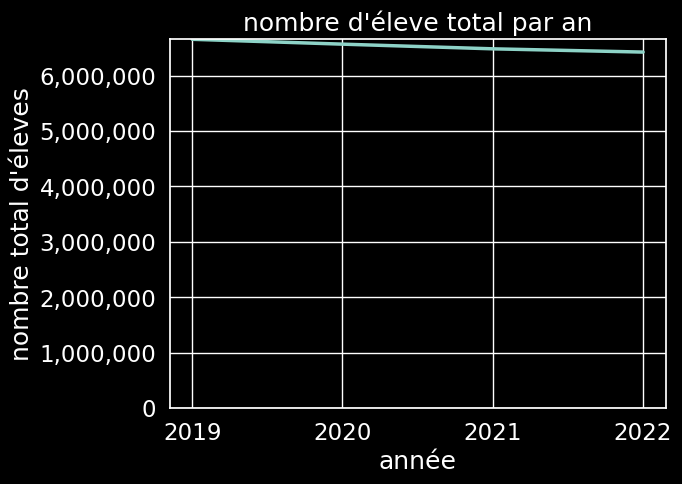

In [87]:
#faire un graphe qui montre le nombre d'eleve
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_total_eleves',ax=ax)
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre d'éleve total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'éleves")
plt.show()


Le nombre d'éleve baisse depuis 4 ans.

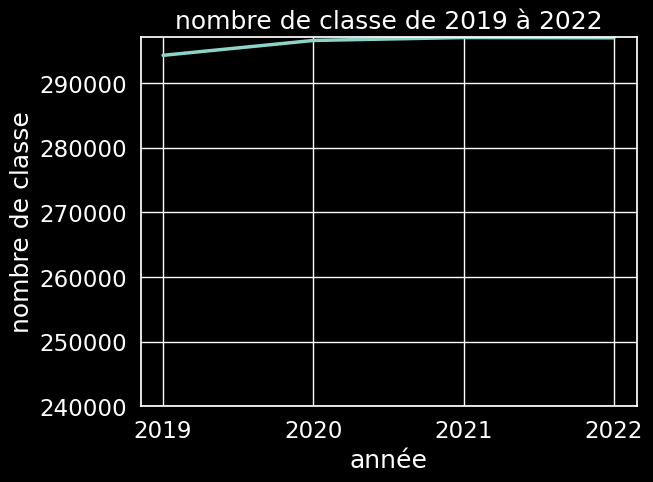

In [88]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_total_classes',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de classe de 2019 à 2022")
ax.set_xlabel("année")
ax.set_ylabel("nombre de classe")
ax.set_ylim(240000)
plt.show()

Le nombre de classe augmente. 

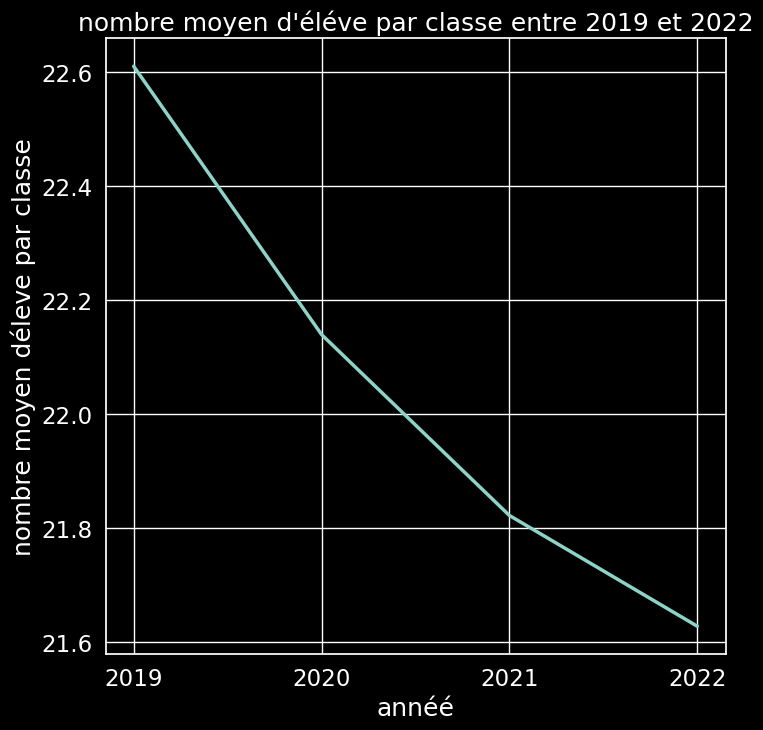

In [89]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='Nombre_eleves_par_classe_moyenne',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen d'éléve par classe entre 2019 et 2022")
ax.set_xlabel("annéé")
ax.set_ylabel("nombre moyen déleve par classe")
ax.set_ylim()
plt.show()

Le nombre d´éléve diminue et le nombre de classe augmente. Sans surprise le nombre moyen d'éléve par classe diminue.

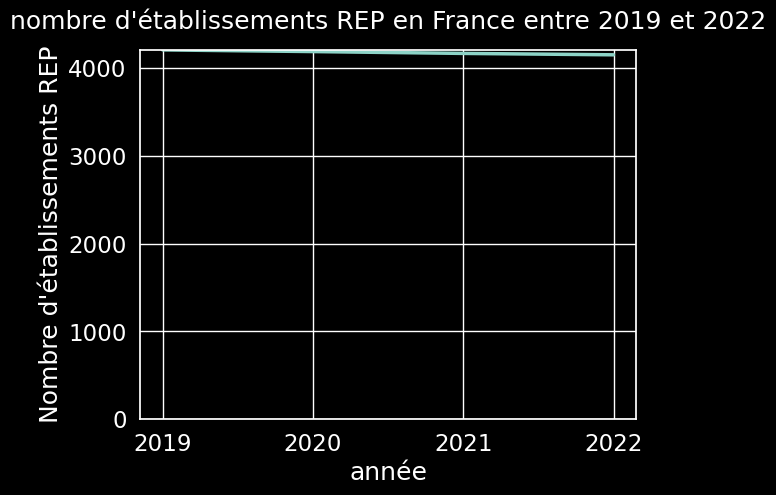

In [90]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='rep',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissements REP en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'établissements REP")
ax.set_ylim(0)
plt.show()

Le nombre d'établissement en wone REP baisse légérement.

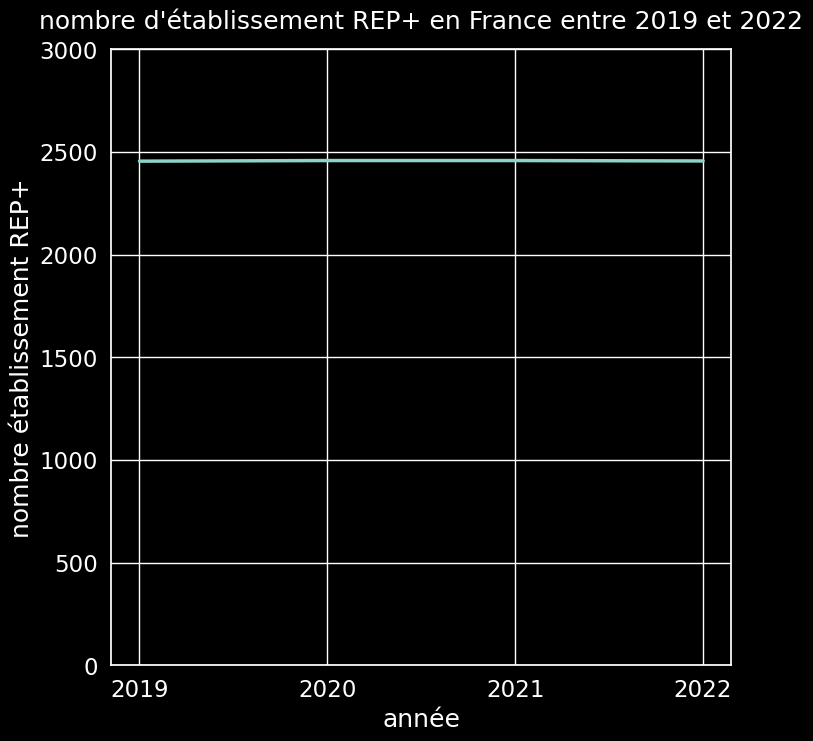

In [91]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='rep_plus',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissement REP+ en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP+")
ax.set_ylim(0,3000)
plt.show()

Le nombre d'établissement en zone REP + est stable.

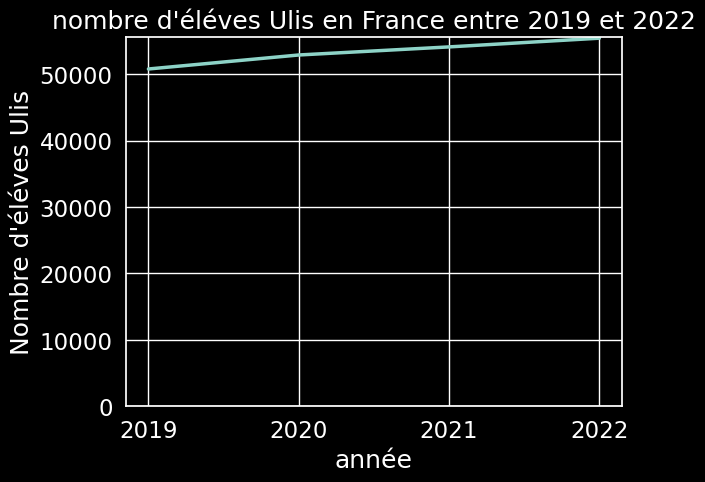

In [92]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='nombre_eleves_ulis',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'éléves Ulis en France entre 2019 et 2022")
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Le nombre d'éléves Ulis augmente depuis 4 ans.

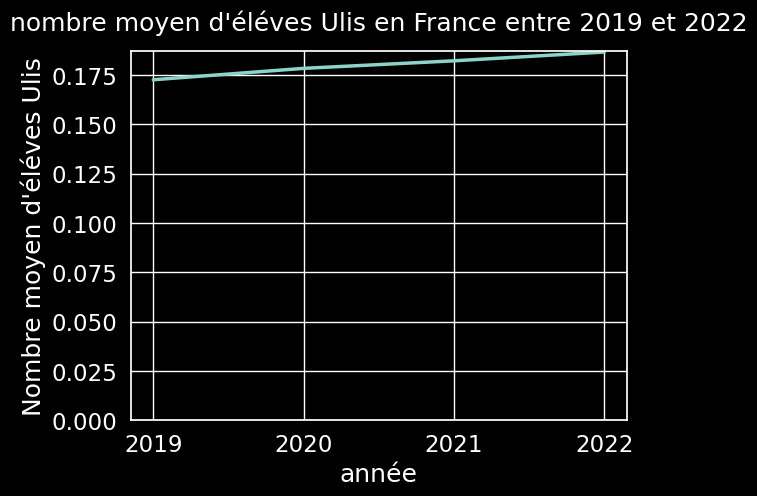

In [93]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='ulis_moyen_classe',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen d'éléves Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Nombre moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Environ une classe sur 6 à un éléve Ulis.

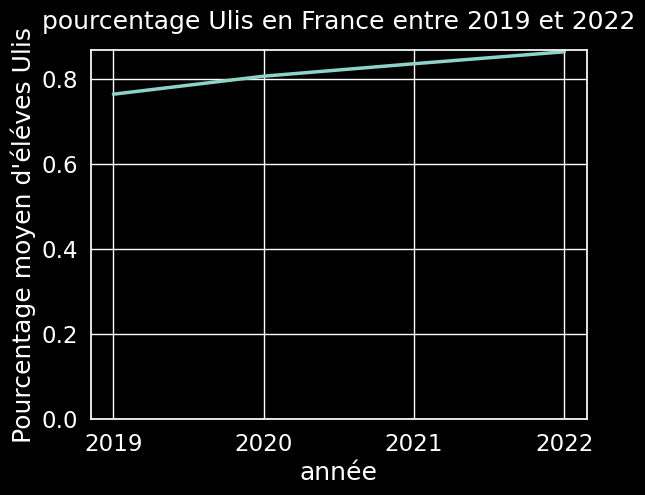

In [94]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole,x='rentree_scolaire',y='pourcentage_ulis',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("pourcentage Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Pourcentage moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Les ulis representent environ 1 éléve sur 100. 

Conclusion France général: <br>
Le nombre d'éléve par classe à baisser en France. Cela est du en partie à une baisse du nombre d'éléve, mais aussi à l'augmentation du nombre de classe.
Il faut aussi noter une augmentation du nombre d'éléve Ulis qui nécéssite plus d'attention. 

In [95]:
# libéré un peu de mémoire. 
del france_ecole

# Analyse générale public/privée en France

In [96]:
# creer un fichier france privée_public
france_ecole_public_prive = fichier_ecole_elementaire.groupby(by=['rentree_scolaire','secteur']).sum(numeric_only=True)
france_ecole_public_prive.reset_index(inplace=True)

In [97]:
france_ecole_public_prive["pourcentage_ulis"] = france_ecole_public_prive["nombre_eleves_ulis"] / france_ecole_public_prive["nombre_total_eleves"] *100
france_ecole_public_prive["ulis_moyen_classe"] = france_ecole_public_prive["nombre_eleves_ulis"] / france_ecole_public_prive["nombre_total_classes"]
france_ecole_public_prive["Nombre_eleves_par_classe_moyenne"] = france_ecole_public_prive['nombre_total_eleves'] / france_ecole_public_prive['nombre_total_classes']

In [98]:
france_ecole_public_prive.head()

,rentree_scolaire,secteur,effectifs,ips,rep,rep_plus,nombre_total_classes,nombre_total_eleves,nombre_eleves_preelementaire_hors_ulis,nombre_eleves_elementaire_hors_ulis,nombre_eleves_ulis,nombre_eleves_cp_hors_ulis,nombre_eleves_ce1_hors_ulis,nombre_eleves_ce2_hors_ulis,nombre_eleves_cm1_hors_ulis,nombre_eleves_cm2_hors_ulis,code_postal,pourcentage_ulis,ulis_moyen_classe,Nombre_eleves_par_classe_moyenne
0,2019,PRIVE,0.0,0.0,0,0,35650,888584,299965,585382,3237,111142,113515,117016,120458,123251,240094979,0.364287,0.090799,24.925217
1,2019,PUBLIC,0.0,0.0,4208,2455,258611,5764881,2141855,3575465,47561,715887,719727,714199,714925,710727,2387840344,0.825013,0.183909,22.291708
2,2020,PRIVE,0.0,0.0,0,0,35707,874126,291332,579462,3332,110292,111942,115290,118937,123001,239509490,0.381181,0.093315,24.480522
3,2020,PUBLIC,0.0,0.0,4189,2458,260853,5691721,2083648,3558498,49575,713578,708775,715864,705264,715017,2377660352,0.871002,0.190050,21.819649
4,2021,PRIVE,0.0,0.0,0,0,35384,867704,289254,574856,3594,108239,112057,114427,118184,121949,238791971,0.414197,0.101571,24.522496


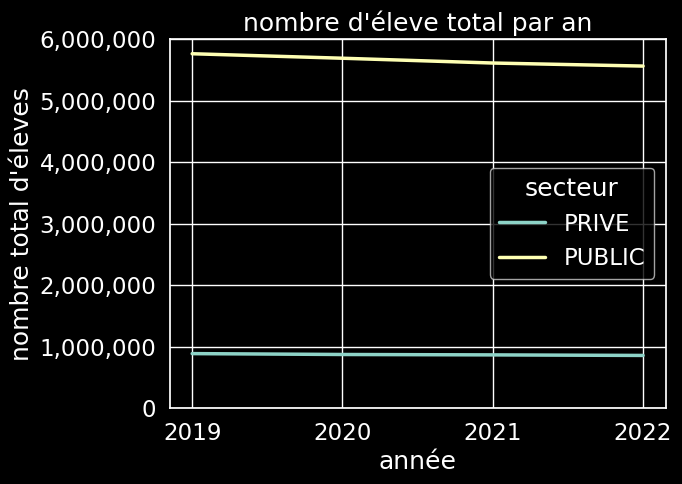

In [99]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='nombre_total_eleves',hue="secteur",ax=ax)
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre d'éleve total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'éleves")
plt.show()

Le secteur public connait une plus forte baisse du nombre d'éléve que le privée.<br>
Le secteur privée reste relativement stable mais en légére baisse<br>

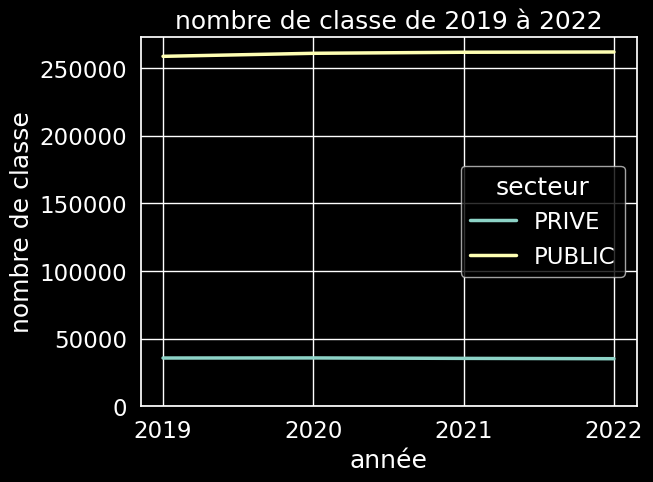

In [100]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='nombre_total_classes',hue="secteur",ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre de classe de 2019 à 2022")
ax.set_xlabel("année")
ax.set_ylabel("nombre de classe")
ax.set_ylim(0)
plt.show()

Le nombre de classe en seceur privée est relativement stable. Le secteur public connais une légére augmentation du nombre de classe.

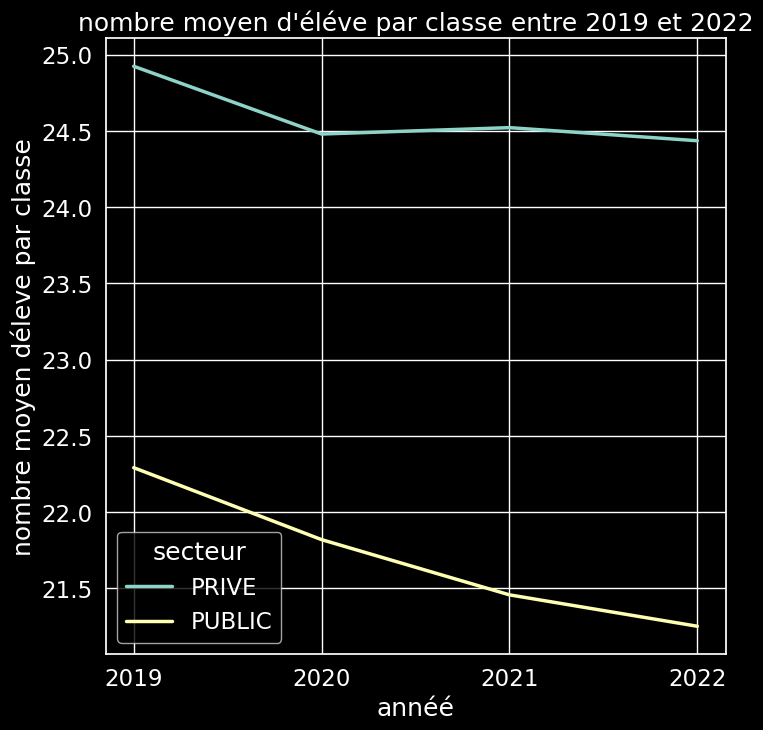

In [101]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='Nombre_eleves_par_classe_moyenne',hue="secteur",ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen d'éléve par classe entre 2019 et 2022")
ax.set_xlabel("annéé")
ax.set_ylabel("nombre moyen déleve par classe")
ax.set_ylim()
plt.show()

Les éléves sont plus nombreux dans les classes du privée que dans les classes du public.<br>
On peux noter une chute du nombre d'éléve dans les 2 secteur. Mais une chute plus forte dans le public.<br> 

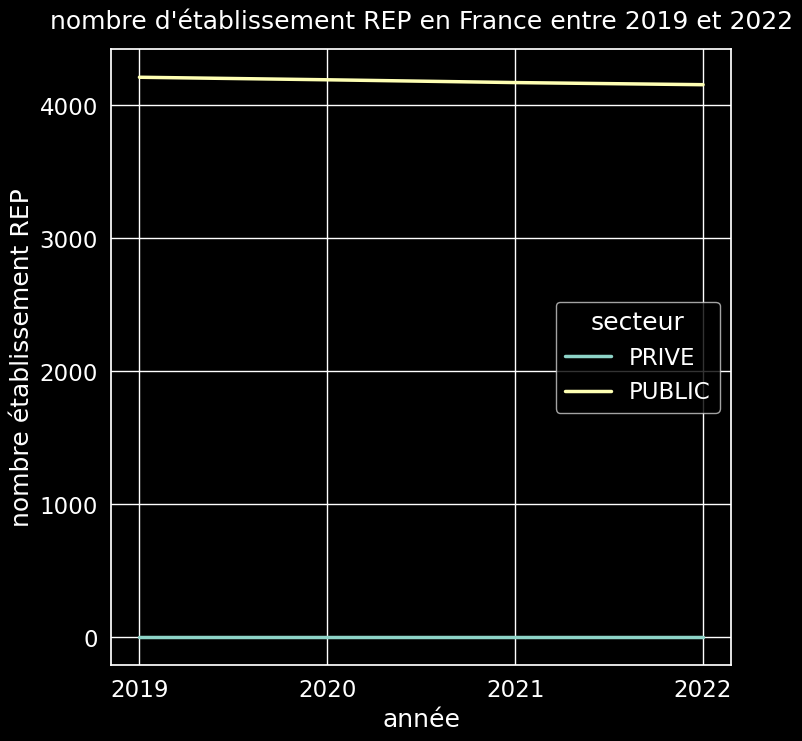

In [107]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='rep',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissement REP en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP")
ax.set_ylim()
plt.show()

Pas de REP en privée.

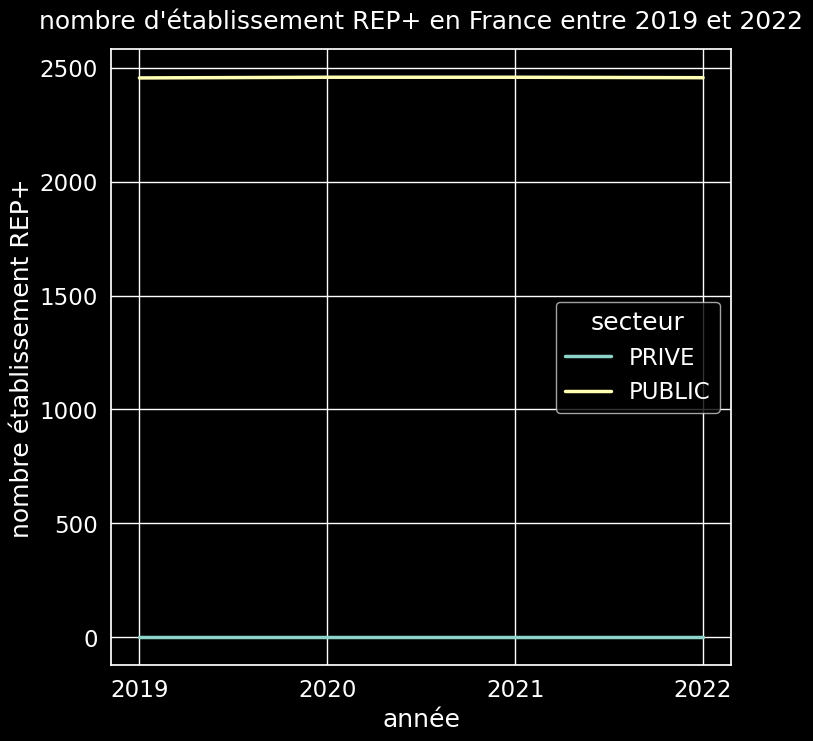

In [103]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='rep_plus',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'établissement REP+ en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre établissement REP+")
ax.set_ylim()
plt.show()

pas de REP+ en privée.

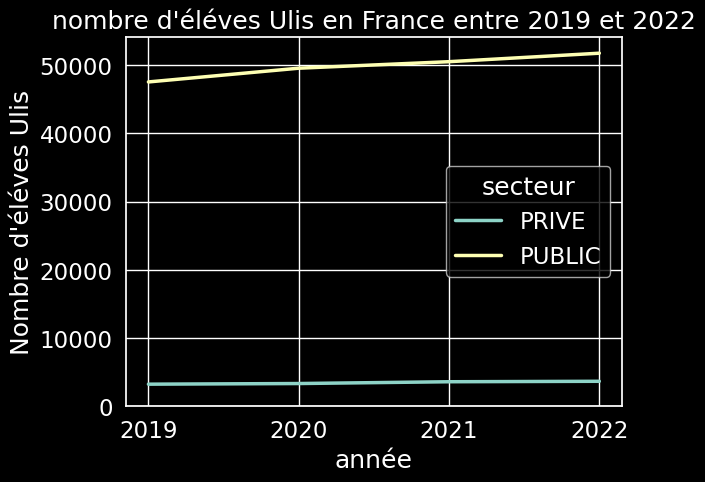

In [104]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='nombre_eleves_ulis',hue="secteur",ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d'éléves Ulis en France entre 2019 et 2022")
ax.set_xlabel("année")
ax.set_ylabel("Nombre d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Il y a des éléves Ulis dans le privée et dans le public

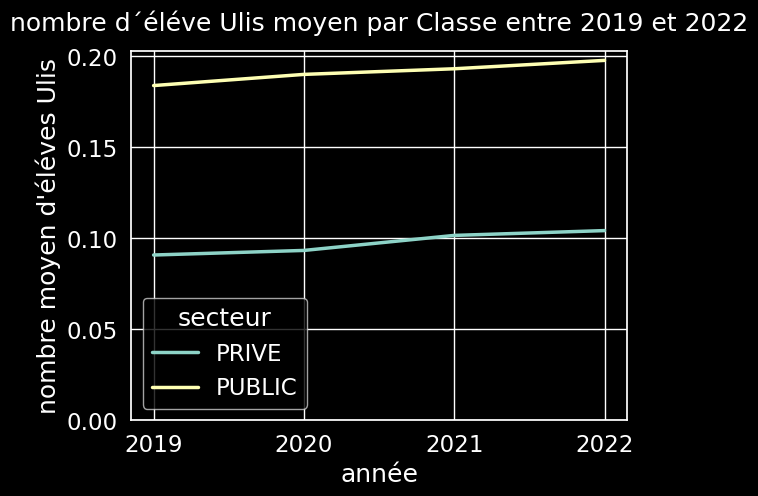

In [105]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='ulis_moyen_classe',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d´éléve Ulis moyen par Classe entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Mais dans une proportion moindre. Il y a 2 fois plus d'éléve Ulis dans le public que dans le privée.

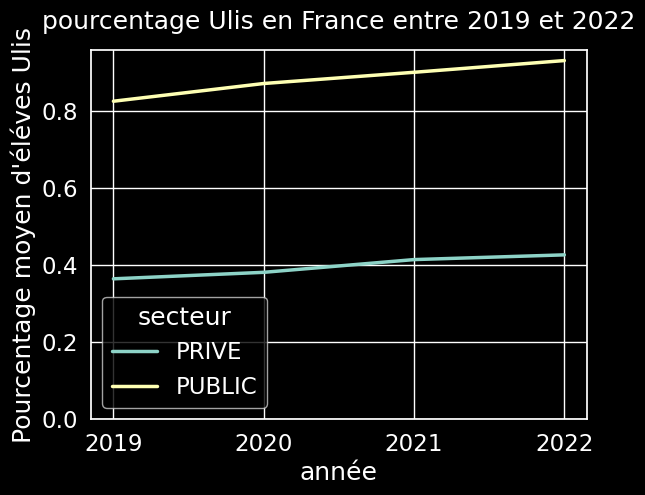

In [106]:
fig,ax = plt.subplots()
sns.lineplot(data=france_ecole_public_prive,x='rentree_scolaire',y='pourcentage_ulis',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("pourcentage Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Pourcentage moyen d'éléves Ulis")
ax.set_ylim(0)
plt.show()

Nous avons donc 2 fois moins de chance d'avoir un éléves Ulis dans le privée que dans le public.